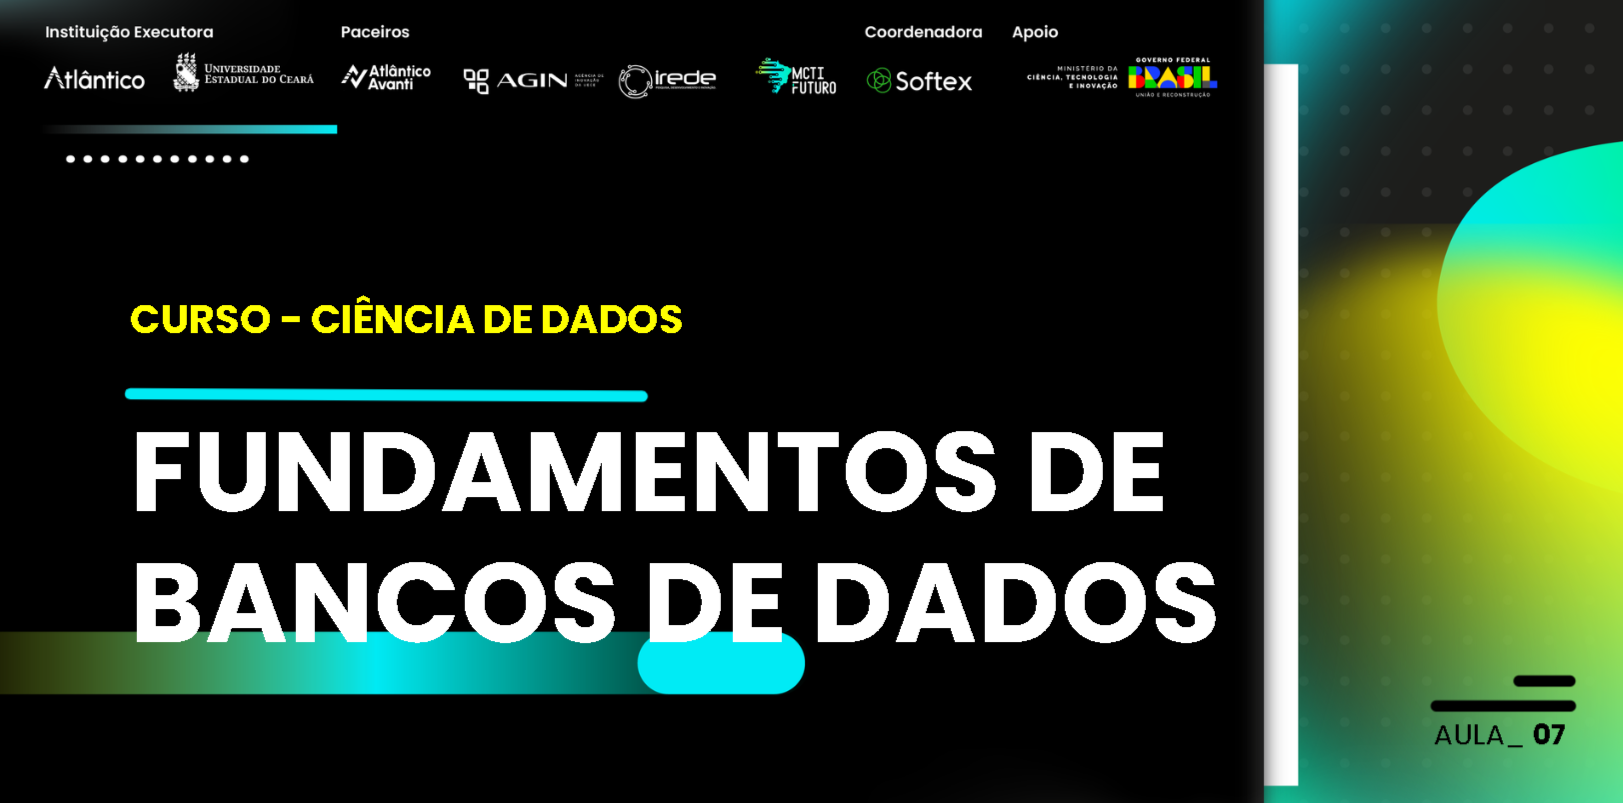

### Preparação.....

# 1. Mini Tutorial: Instalação do PostgreSQL

## O que é PostgreSQL?
PostgreSQL é um sistema de gerenciamento de banco de dados relacional avançado, open-source, com foco em extensibilidade e conformidade com padrões SQL.

---

## Passo a Passo para Instalação

### 1. Baixando o PostgreSQL
1. Acesse o site oficial do PostgreSQL: [https://www.postgresql.org/download/](https://www.postgresql.org/download/).
2. Escolha o sistema operacional adequado (Windows, macOS, Linux) e siga para a página de download.

---

### 2. Instalando no Windows
1. Baixe o **installer** correspondente ao seu sistema.
2. Execute o arquivo baixado e siga as etapas:
   - Escolha os componentes a instalar: **PostgreSQL Server**, **pgAdmin**, **Command Line Tools**.
   - Defina uma senha para o usuário `postgres`.
   - Escolha a porta (padrão: `5432`).
3. Finalize a instalação.

---

### 3. Instalando no Linux
#### Debian/Ubuntu
Execute os comandos abaixo no terminal:
```bash
sudo apt update
sudo apt install postgresql
postgresql-contrib


In [ ]:
!sudo apt-get -y -qq update
!sudo apt-get -y -qq install postgresql
!sudo service postgresql start

# Setup a password `postgres` for username `postgres`
!sudo -u postgres psql -U postgres -c "ALTER USER postgres PASSWORD 'postgres';"

#### Instalaçao Bibliotecas

In [ ]:
pip install psycopg2 pandas

# 2. Introdução ao Banco de Dados

## O que é um Banco de Dados?
Um banco de dados é uma coleção organizada de dados. É amplamente utilizado para armazenar, recuperar e gerenciar informações.

### Componentes principais:
1. **Tabelas**: Estrutura que armazena dados em linhas e colunas.
2. **Chave Primária**: Identificador único para cada registro.
3. **Chave Estrangeira**: Conecta tabelas, criando relações.

### Relacionamentos:
- **1:1 (Um para Um)**: Exemplo: um funcionário e seu número de identificação.
- **1:N (Um para Muitos)**: Exemplo: um cliente pode fazer vários pedidos.
- **N:M (Muitos para Muitos)**: Exemplo: estudantes podem estar matriculados em vários cursos, e cursos podem ter vários estudantes.

Nesta aula, usaremos PostgreSQL para manipular um banco de dados que contém:
1. Clientes
2. Pedidos
3. Produtos
4. Detalhes dos pedidos


# 2.1 Criação de Banco de Dados e Tabelas

## Comandos DDL
Comandos de Data Definition Language (DDL) permitem criar e definir a estrutura do banco de dados. Os principais comandos são:
- `CREATE TABLE`: Cria uma tabela.
- `ALTER TABLE`: Modifica uma tabela existente.
- `DROP TABLE`: Remove uma tabela.

### Vamos criar tabelas para um sistema de gerenciamento de pedidos:
1. **Clientes**: Informações sobre os clientes.
2. **Pedidos**: Informações sobre os pedidos realizados.
3. **Produtos**: Produtos disponíveis para venda.
4. **DetalhesPedidos**: Detalhes de cada pedido (quantidade, produto, etc.).


# 2.2 Conexão com PostgreSQL

Vamos conectar ao PostgreSQL, criar um banco de dados chamado `auladb` e quatro tabelas: `Clientes` , `Produtos` , `Pedidos` , `DetalhesPedidos`.


In [ ]:
import psycopg2

# Conexão com PostgreSQL
conn = psycopg2.connect(
    dbname="postgres", # nome do banco
    user="postgres",  # usuário de acesso
    password="postgres",  # senha de acesso
    host="localhost", # endereço do servidor do banco de dados
    port="5432" # porta de acesso
)
conn.autocommit = True
cursor = conn.cursor()


# Criar banco de dados
cursor.execute("DROP DATABASE IF EXISTS auladb")
cursor.execute("CREATE DATABASE auladb")
print("Banco de dados 'auladb' criado com sucesso!")

# Fechar a Conexao
conn.close()

## 2.2.1 Diagrama de Entidade-Relacionamento

![ERD_diagram.png](attachment:ERD_diagram.png)

# 2.3 Criação de Tabelas - Data Definition Language (DDL)

Vamos criar as tabelas `Clientes` , `Produtos` , `Pedidos` , `DetalhesPedidos`

In [ ]:
# Realizar nova conexão assumindo agora o banco auladb
conn = psycopg2.connect(
    dbname="auladb", #  nome do banco
    user="postgres",  # usuário de acesso
    password="postgres",  # senha de acesso
    host="localhost", # endereço do servidor do banco de dados
    port="5432" # porta de acesso
)
cursor = conn.cursor()

# Criar tabelas no PostgreSQL
cursor.execute('''
CREATE TABLE Clientes (
    id_cliente SERIAL PRIMARY KEY,
    nome VARCHAR(100) NOT NULL,
    email VARCHAR(100) UNIQUE NOT NULL,
    telefone VARCHAR(15)
)
''')

cursor.execute('''
CREATE TABLE Produtos (
    id_produto SERIAL PRIMARY KEY,
    nome_produto VARCHAR(100) NOT NULL,
    preco DECIMAL(10, 2) NOT NULL
)
''')

cursor.execute('''
CREATE TABLE Pedidos (
    id_pedido SERIAL PRIMARY KEY,
    id_cliente INT NOT NULL,
    data_pedido DATE NOT NULL DEFAULT CURRENT_DATE,
    FOREIGN KEY (id_cliente) REFERENCES Clientes (id_cliente)
)
''')

cursor.execute('''
CREATE TABLE DetalhesPedidos (
    id_detalhe SERIAL PRIMARY KEY,
    id_pedido INT NOT NULL,
    id_produto INT NOT NULL,
    quantidade INT NOT NULL,
    FOREIGN KEY (id_pedido) REFERENCES Pedidos (id_pedido),
    FOREIGN KEY (id_produto) REFERENCES Produtos (id_produto)
)
''')

conn.commit()
print("Tabelas criadas com sucesso!")
conn.close()

# 2.4 Inserção de Dados

## Comandos DML - Data Manipulation Language
Os comandos de Data Manipulation Language (DML) são usados para manipular dados no banco de dados. Exemplos:
- `INSERT INTO`: Insere novos dados.
- `UPDATE`: Atualiza dados existentes.
- `DELETE`: Remove dados.

Vamos adicionar dados fictícios às tabelas.


In [ ]:
import pandas as pd

In [ ]:
# Realizar nova conexão assumindo agora o banco auladb
conn = psycopg2.connect(
    dbname="auladb", #  nome do banco
    user="postgres",  # usuário de acesso
    password="postgres",  # senha de acesso
    host="localhost", # endereço do servidor do banco de dados
    port="5432" # porta de acesso
)
cursor = conn.cursor()

# Inserir dados fictícios diretamente por uma string sql
cursor.execute("INSERT INTO Clientes (nome, email, telefone) VALUES ('Alice', 'alice@example.com', '123456789')")
cursor.execute("INSERT INTO Clientes (nome, email, telefone) VALUES ('Bob', 'bob@example.com', '987654321')")
cursor.execute("INSERT INTO Clientes (nome, email, telefone) VALUES ('Jhon', 'jhon@example.com', '987654351')")
conn.commit()
print('Dados inseridos com sucesso')

query = "SELECT * FROM Clientes"
df = pd.read_sql_query(query, conn)
print(df)
conn.close()

## Inserindo dados a partir de um dicionário

In [ ]:
# Realizar nova conexão assumindo agora o banco auladb
conn = psycopg2.connect(
    dbname="auladb", #  nome do banco
    user="postgres",  # usuário de acesso
    password="postgres",  # senha de acesso
    host="localhost", # endereço do servidor do banco de dados
    port="5432" # porta de acesso
)
cursor = conn.cursor()

# Inserir dados fictícios a partir de um dicionário
cliente = {'nome': 'João' , 'email': 'joao@gmail.com' , 'telefone': '(85) 123456879'}
#cursor.execute(f"INSERT INTO Clientes (nome, email, telefone) VALUES ( '{cliente['nome']}' , '{cliente['email']}' , '{cliente['telefone']}')")

conn.commit()
print('Dados inseridos com sucesso')
query = "SELECT * FROM Clientes"
df = pd.read_sql_query(query, conn)
print(df)

conn.close()

## Inserindo dados a partir de um dataframe

In [ ]:
import pandas as pd

In [ ]:
# Inserir dados fictícios a partir de um dataFrame

nomes = ['Maria', 'Joana' , 'José']
emails = ['maria@outlook.com', 'Joana@gmail.com', 'jose@gmail.com']
telefones = ['123654987', '1122334455' , '1243546789']


clientes = pd.DataFrame({'nome': nomes,
                       'email': emails,
                        'telefone': telefones})

clientes

In [ ]:

conn = psycopg2.connect(
    dbname="auladb", #  nome do banco
    user="postgres",  # usuário de acesso
    password="postgres",  # senha de acesso
    host="localhost", # endereço do servidor do banco de dados
    port="5432" # porta de acesso
)
cursor = conn.cursor()


# Percorrendo todos os valores do DF clientes
for cli in clientes.values:
    cursor.execute(f"INSERT INTO Clientes (nome, email, telefone) VALUES ( '{cli[0]}' , '{cli[1]}' , '{cli[2]}')")

conn.commit()
print('Dados inseridos com sucesso')
conn.close()


## Inserindo alguns produtos

In [ ]:

conn = psycopg2.connect(
    dbname="auladb", #  nome do banco
    user="postgres",  # usuário de acesso
    password="postgres",  # senha de acesso
    host="localhost", # endereço do servidor do banco de dados
    port="5432" # porta de acesso
)
cursor = conn.cursor()

# Inserir produtos
cursor.execute("INSERT INTO Produtos (nome_produto, preco) VALUES ('Notebook', 3500.00)")
cursor.execute("INSERT INTO Produtos (nome_produto, preco) VALUES ('Mouse', 150.00)")

conn.commit()
print('Dados inseridos com sucesso')
conn.close()

## Inserindo alguns pedidos

In [ ]:
conn = psycopg2.connect(
    dbname="auladb", #  nome do banco
    user="postgres",  # usuário de acesso
    password="postgres",  # senha de acesso
    host="localhost", # endereço do servidor do banco de dados
    port="5432" # porta de acesso
)
cursor = conn.cursor()


# Inserir pedidos
cursor.execute("INSERT INTO Pedidos (id_cliente) VALUES (7)")
cursor.execute("INSERT INTO Pedidos (id_cliente) VALUES (8)")


conn.commit()
print('Dados inseridos com sucesso')
conn.close()

## Inserindo detalhes dos pedidos

In [ ]:
conn = psycopg2.connect(
    dbname="auladb", #  nome do banco
    user="postgres",  # usuário de acesso
    password="postgres",  # senha de acesso
    host="localhost", # endereço do servidor do banco de dados
    port="5432" # porta de acesso
)
cursor = conn.cursor()

# Inserir detalhes do pedido
cursor.execute("INSERT INTO DetalhesPedidos (id_pedido, id_produto, quantidade) VALUES (4, 5, 1)")
cursor.execute("INSERT INTO DetalhesPedidos (id_pedido, id_produto, quantidade) VALUES (4, 6, 2)")
cursor.execute("INSERT INTO DetalhesPedidos (id_pedido, id_produto, quantidade) VALUES (5, 5, 1)")

conn.commit()
print('Dados inseridos com sucesso')
conn.close()

# 2.5 Consultas SQL e pandas

Nesta seção, exploraremos consultas mais avançadas, usando junções e funções de agregação. Além disso, utilizaremos pandas para carregar os dados em DataFrames e realizar análises diretamente no Python.


In [ ]:
conn = psycopg2.connect(
    dbname="auladb", #  nome do banco
    user="postgres",  # usuário de acesso
    password="postgres",  # senha de acesso
    host="localhost", # endereço do servidor do banco de dados
    port="5432" # porta de acesso
)

# 1. Consultar todos os clientes
query = "SELECT * FROM Clientes"
df_clientes = pd.read_sql(query, conn)
print("Clientes:")
print(df_clientes)

# 2. Consultar todos os produtos
query = "SELECT * FROM Produtos"
df_produtos = pd.read_sql(query, conn)
print("\nProdutos:")
print(df_produtos)

# 3. Listar todos os pedidos com detalhes
query = '''
SELECT p.id_pedido, c.nome AS cliente, pr.nome_produto, dp.quantidade, dp.quantidade * pr.preco AS total
FROM Pedidos p
JOIN Clientes c ON p.id_cliente = c.id_cliente
JOIN DetalhesPedidos dp ON p.id_pedido = dp.id_pedido
JOIN Produtos pr ON dp.id_produto = pr.id_produto
'''
df_pedidos = pd.read_sql(query, conn)
print("\nPedidos com Detalhes:")
print(df_pedidos)

# 4. Total de pedidos por cliente
query = '''
SELECT c.nome AS cliente, COUNT(p.id_pedido) AS total_pedidos, SUM(dp.quantidade * pr.preco) AS valor_total
FROM Clientes c
JOIN Pedidos p ON c.id_cliente = p.id_cliente
JOIN DetalhesPedidos dp ON p.id_pedido = dp.id_pedido
JOIN Produtos pr ON dp.id_produto = pr.id_produto
GROUP BY c.nome
ORDER BY valor_total DESC
'''
df_totais = pd.read_sql(query, conn)
print("\nTotal de Pedidos por Cliente:")
print(df_totais)

# 5. Produtos mais vendidos (análise de quantidade)
query = '''
SELECT pr.nome_produto, SUM(dp.quantidade) AS total_quantidade, SUM(dp.quantidade * pr.preco) AS receita_total
FROM Produtos pr
JOIN DetalhesPedidos dp ON pr.id_produto = dp.id_produto
GROUP BY pr.nome_produto
ORDER BY total_quantidade DESC
'''
df_produtos_vendidos = pd.read_sql(query, conn)
print("\nProdutos mais Vendidos:")
print(df_produtos_vendidos)

conn.close()

## Explicação
1. **Pedidos com Detalhes:** Mostramos todas as informações sobre pedidos, clientes e produtos usando múltiplas junções.
2. **Total de Pedidos por Cliente:** Analisamos o número de pedidos e o valor total gasto por cada cliente.
3. **Produtos mais Vendidos:** Identificamos os produtos mais populares em termos de quantidade e receita.


In [ ]:
df_pedidos[df_pedidos['quantidade']>1] # algum pedido com a quantidade de um produto maior que 1

'''
Query semelhante da filtragem em SQL
SELECT p.id_pedido, c.nome, pr.nome_produto, dp.quantidade, dp.quantidade * pr.preco AS total
FROM Pedidos p
JOIN Clientes c ON p.id_cliente = c.id_cliente
JOIN DetalhesPedidos dp ON p.id_pedido = dp.id_pedido
JOIN Produtos pr ON dp.id_produto = pr.id_produto
WHERE dp.quantidade > 1
'''

In [ ]:
df_clientes.query('nome == "Maria"') # Filtrando a cliente Maria

In [ ]:
df_filtrado = df_clientes.query("email.str.endswith('@gmail.com')", engine="python")
df_filtrado

## Explicação do Comando: `df.query("email.str.endswith('.com')", engine="python")`

O comando é utilizado para filtrar um DataFrame `df`, retornando apenas as linhas onde o valor na coluna `email` termina com a string **".com"**. Aqui está uma explicação detalhada de cada parte:

---

## Desmembrando o Comando

1. **`query`**:
   - É um método do pandas que permite filtrar dados utilizando uma string com expressões condicionais de forma legível.
   - A string passada ao `query` define a condição a ser aplicada.

2. **`email`**:
   - Refere-se à coluna chamada `email` do DataFrame.

3. **`str.endswith('.com')`**:
   - `str` é um acessador de strings no pandas, que permite aplicar métodos de manipulação de texto em colunas do tipo string.
   - `endswith('.com')` retorna um **booleano (True ou False)** para cada valor da coluna, indicando se a string termina com `'.com'`.

4. **`engine="python"`**:
   - O pandas permite que você use dois "motores" para o método `query`: o padrão, que é baseado em expressões numéricas simples, e o Python, que é necessário para usar métodos de manipulação de strings ou outras operações mais complexas.
   - Aqui, como estamos usando `str.endswith`, que é um método do pandas baseado em Python, o `engine="python"` é necessário.

5. **`df.query`**:
   - Filtra o DataFrame com base na condição que avalia a coluna `email`.

---

## O Que Está Acontecendo?

- A expressão **`email.str.endswith('@gmail.com')`** verifica cada valor na coluna `email` do DataFrame.
- Para cada linha:
  - Se o valor da coluna `email` terminar com `'@gmail.com'`, a linha será incluída no DataFrame filtrado.
  - Caso contrário, será excluída.

---


# 2.6 Update e Remoção de Dados

Os comandos de **atualização** e **remoção** permitem modificar ou excluir registros no banco de dados. São especialmente úteis para manter os dados consistentes e atualizados.

## Comandos SQL
- `UPDATE`: Atualiza um ou mais campos em registros existentes.
- `DELETE`: Remove registros de uma tabela.

Vamos explorar esses comandos com exemplos práticos.


In [ ]:
# 1. Atualizar o e-mail de um cliente

conn = psycopg2.connect(
    dbname="auladb", #  nome do banco
    user="postgres",  # usuário de acesso
    password="postgres",  # senha de acesso
    host="localhost", # endereço do servidor do banco de dados
    port="5432" # porta de acesso
)


# Consultar os dados atualizados
query = "SELECT * FROM Clientes"
df_clientes_antes = pd.read_sql(query, conn)
print("\nClientes antes atualização:")
print(df_clientes_antes)

cursor = conn.cursor()
cursor.execute("UPDATE Clientes SET email = 'alice.novo@email.com' WHERE nome = 'Alice'")
conn.commit()

# Consultar os dados atualizados
query = "SELECT * FROM Clientes"
df_clientes_atualizados = pd.read_sql(query, conn)
print("\nClientes após atualização:")
print(df_clientes_atualizados)
conn.close()


## Atualização na tabela de produtos

In [ ]:
conn = psycopg2.connect(
    dbname="auladb", #  nome do banco
    user="postgres",  # usuário de acesso
    password="postgres",  # senha de acesso
    host="localhost", # endereço do servidor do banco de dados
    port="5432" # porta de acesso
)


# Consultar os produtos antes
query = "SELECT * FROM Produtos"
df_produtos_antes = pd.read_sql(query, conn)
print("\nProdutos antes da atualização de preço:")
print(df_produtos_antes)

# 2. Atualizar o preço de um produto
cursor = conn.cursor()
cursor.execute("UPDATE Produtos SET preco = preco * 1.1 WHERE nome_produto = 'Notebook'")
conn.commit()

# Consultar os produtos atualizados
query = "SELECT * FROM Produtos"
df_produtos_atualizados = pd.read_sql(query, conn)
print("\nProdutos após atualização de preço:")
print(df_produtos_atualizados)

conn.close()

## Deletando informações na tabela de pedidos... Restrição de integridade

In [ ]:
conn = psycopg2.connect(
    dbname="auladb", #  nome do banco
    user="postgres",  # usuário de acesso
    password="postgres",  # senha de acesso
    host="localhost", # endereço do servidor do banco de dados
    port="5432" # porta de acesso
)


# Consultar os pedidos após exclusão
query = "SELECT * FROM Pedidos"
df_pedidos_antes_removidos = pd.read_sql(query, conn)
print("\nPedidos após remoção:")
print(df_pedidos_antes_removidos)

# 3. Excluir um pedido específico
cursor = conn.cursor()
cursor.execute("DELETE FROM Pedidos WHERE id_pedido = 5")
conn.commit()

# Consultar os pedidos após exclusão
query = "SELECT * FROM Pedidos"
df_pedidos_removidos = pd.read_sql(query, conn)
print("\nPedidos após remoção:")
print(df_pedidos_removidos)

conn.close()


In [ ]:
conn = psycopg2.connect(
    dbname="auladb", #  nome do banco
    user="postgres",  # usuário de acesso
    password="postgres",  # senha de acesso
    host="localhost", # endereço do servidor do banco de dados
    port="5432" # porta de acesso
)


cursor = conn.cursor()

# 4. Excluir todos os clientes sem pedidos
cursor.execute('''
DELETE FROM Clientes
WHERE id_cliente NOT IN (SELECT DISTINCT id_cliente FROM Pedidos)
''')
conn.commit()

# Consultar clientes após remoção
query = "SELECT * FROM Clientes"
df_clientes_final = pd.read_sql(query, conn)
print("\nClientes após remoção de inativos:")
print(df_clientes_final)

conn.close()

## Explicação
1. Atualizamos o e-mail de um cliente e o preço de um produto.
2. Excluímos um pedido específico.
3. Removemos clientes que não possuem pedidos associados, garantindo um banco de dados mais limpo e eficiente.

### Observação:
Use sempre critérios claros no comando `DELETE` para evitar remoções acidentais.


# 3. Conceitos Importantes de Banco de Dados NoSQL Usando MongoDB

## O que é um Banco de Dados NoSQL?
- **NoSQL** refere-se a uma categoria de bancos de dados que não utiliza o modelo relacional tradicional.
- Projetados para lidar com grandes volumes de dados distribuídos e não estruturados.
- Exemplos de bancos de dados NoSQL incluem: MongoDB, Cassandra, CouchDB, Redis, entre outros.

---

## Tipos de Bancos de Dados NoSQL
1. **Orientados a Documentos**:
   - Armazenam dados no formato JSON ou BSON.
   - Exemplos: MongoDB, CouchDB.
   
   
2. **Chave-Valor**:
   - Cada item é armazenado como um par de chave e valor.
   - Exemplos: Redis, DynamoDB.
   
   
3. **Colunas Largas**:
   - Armazenam dados em tabelas, mas permitem flexibilidade no número de colunas por linha.
   - Exemplos: Cassandra, HBase.
   
   
4. **Grafos**:
   - Armazenam dados na forma de nós e arestas, ideais para representar relações complexas.
   - Exemplos: Neo4j, ArangoDB.

---

## 3.1 Principais Conceitos no MongoDB

### 1. **Coleções**
- Conjuntos de documentos, equivalentes a tabelas em bancos de dados relacionais.
- Não exigem um esquema fixo, permitindo flexibilidade nos dados armazenados.

### 2. **Documentos**
- Unidade básica de dados no MongoDB.
- Representados em JSON ou BSON (Binária).
- Contêm pares de chave-valor e podem ser aninhados (ou seja, conter subdocumentos).

Exemplo de Documento:
```json
{
  "nome": "João",
  "idade": 30,
  "enderecos": [
    { "rua": "Rua A", "cidade": "São Paulo" },
    { "rua": "Rua B", "cidade": "Rio de Janeiro" }
  ]
}


## 3.2 Tutorial: Usando MongoDB com Python e Pandas

## Pré-requisitos

Antes de começar, certifique-se de que você possui as bibliotecas necessárias instaladas:

1. Instale o driver do MongoDB para Python:
   ```bash
   pip install pymongo


## Mini Tutorial: Instalação do MongoDB

## O que é MongoDB?
MongoDB é um banco de dados NoSQL, orientado a documentos, que armazena dados no formato JSON/BSON. É amplamente utilizado por sua flexibilidade e escalabilidade.

---

## Passo a Passo para Instalação

### 1. Baixando o MongoDB
1. Acesse o site oficial do MongoDB: [https://www.mongodb.com/try/download/community](https://www.mongodb.com/try/download/community).
2. Escolha sua plataforma (Windows, macOS, Linux).
3. Baixe a versão **Community Server**.

---

### 2. Instalando no Windows
1. Execute o instalador baixado.
2. Siga as etapas do assistente de instalação:
   - Aceite os termos de licença.
   - Escolha a opção **Complete**.
   - Marque a opção para instalar o **MongoDB Compass** (interface gráfica opcional).
3. Após a instalação, adicione o diretório `bin` do MongoDB ao **PATH** do sistema:
   - Vá até `Configurações > Sistema > Sobre > Configurações avançadas do sistema`.
   - Adicione `C:\Program Files\MongoDB\Server\<versão>\bin` ao PATH.
4. Abra o Prompt de Comando e verifique a instalação:
   ```bash
   mongod --version

5. Ferramentas Adicionais
- MongoDB Compass: Interface gráfica para gerenciar seus bancos de dados.
- MongoDB Atlas: Serviço de MongoDB na nuvem.

In [ ]:
pip install pymongo

## 3.3 Conectando ao MongoDB

O primeiro passo é estabelecer uma conexão com o servidor MongoDB.

In [ ]:
from pymongo import MongoClient

# Conecte ao servidor MongoDB
client = MongoClient('mongodb://localhost:27017/')

# Crie ou conecte-se ao banco de dados
db = client['exemplo_db']

# Crie ou conecte-se à coleção
collection = db['exemplo_colecao']

print("Conexão com o MongoDB estabelecida!")

### Inserindo Dados

#### Inserir um único documento

In [ ]:
# Inserir um único documento
documento = {"nome": "João", "idade": 30, "cidade": "São Paulo"}
collection.insert_one(documento)
print("Documento inserido com sucesso!")


#### Inserir múltiplos documento

In [ ]:
# Inserir múltiplos documentos
documentos = [
    {"nome": "Maria", "idade": 25, "cidade": "Rio de Janeiro"},
    {"nome": "Pedro", "idade": 35, "cidade": "Belo Horizonte"},
    {"nome": "Ana", "idade": 28, "cidade": "Fortaleza"}
]
collection.insert_many(documentos)
print("Múltiplos documentos inseridos com sucesso!")

### Selecionando Dados

#### Selecionar todos os documentos

In [ ]:
import pandas as pd

# Buscar todos os documentos
resultados = collection.find()

# Converter os resultados em um DataFrame do pandas
df = pd.DataFrame(resultados)
print(df)

#### Selecionar com critérios (filtro)

In [ ]:
# Buscar documentos com idade maior que 30:

resultados = collection.find({"idade": {"$gt": 30}}) # greater than ($gt) -> Maior que
df_filtrado = pd.DataFrame(resultados)
print(df_filtrado)

In [ ]:
# Buscar documentos onde a idade seja menor ou igual a 32:

resultados = collection.find({"idade": {"$lte": 32}})
df = pd.DataFrame(resultados)
print(df)

In [ ]:
# Buscar documentos onde a cidade seja "Salvador":

resultados = collection.find({"cidade": "Salvador"})
df = pd.DataFrame(resultados)
print(df)

In [ ]:
# Buscar documentos onde a idade seja 28 e a cidade seja "Fortaleza":

resultados = collection.find({"idade": 28, "cidade": "Fortaleza"})
df = pd.DataFrame(resultados)
print(df)

In [ ]:
# Buscar documentos onde a idade seja 30 ou a cidade seja "Rio de Janeiro":

resultados = collection.find({"$or": [{"idade": 30}, {"cidade": "Rio de Janeiro"}]})
df = pd.DataFrame(resultados)
print(df)

In [ ]:
# Buscar documentos onde a idade seja maior que 25 e a cidade seja "São Paulo":
resultados = collection.find({"$and": [{"idade": {"$gt": 25}}, {"cidade": "São Paulo"}]})
df = pd.DataFrame(resultados)
print(df)

In [ ]:
# Buscar documentos que não possuem o campo idade:
resultados = collection.find({"idade": {"$exists": False}})
df = pd.DataFrame(resultados)
print(df)

In [ ]:
# Buscar documentos, retornando apenas os campos nome e cidade:
resultados = collection.find({}, {"_id": 0, "nome": 1, "cidade": 1})
df = pd.DataFrame(resultados)
print(df)

### Atualizando Dados

#### Atualizar um único documento

In [ ]:
# Atualizar a cidade de um documento com nome "João"
collection.update_one({"nome": "João"}, {"$set": {"cidade": "Curitiba"}})
print("Documento atualizado com sucesso!")

#### Atualizar múltiplos documentos

In [ ]:
# Atualizar a idade para 29 para todos com a cidade "Fortaleza"
collection.update_many({"cidade": "Fortaleza"}, {"$set": {"idade": 29}})
print("Múltiplos documentos atualizados com sucesso!")

### Removendo Dados

#### Remover um único documento

In [ ]:
# Remover o documento com nome "Maria"
collection.delete_one({"nome": "Maria"})
print("Documento removido com sucesso!")

#### Remover múltiplos documentos


In [ ]:
# Remover todos os documentos com idade menor que 30
collection.delete_many({"idade": {"$lt": 30}})
print("Múltiplos documentos removidos com sucesso!")


### Integração com Pandas
#### Ler dados diretamente do MongoDB em um DataFrame

In [ ]:
# Buscar todos os documentos
resultados = collection.find()

# Converter para DataFrame
df = pd.DataFrame(resultados)

# Exibir o DataFrame
print(df)

#### Inserir dados de um DataFrame no MongoDB

In [ ]:
# Criar um DataFrame
novos_dados = pd.DataFrame({
    "nome": ["Carlos", "Fernanda"],
    "idade": [40, 32],
    "cidade": ["Brasília", "Salvador"]
})

# Inserir cada linha do DataFrame como um documento no MongoDB
collection.insert_many(novos_dados.to_dict('records'))
print("Dados do DataFrame inseridos no MongoDB com sucesso!")


## 4. Comparação Resumida

| Aspecto                  | SQL                             | NoSQL                         |
|--------------------------|---------------------------------|-------------------------------|
| **Estrutura de Dados**   | Tabelas fixas, esquema rígido  | Flexível (documentos, grafos, etc.) |
| **Consistência**         | ACID (forte)                   | Eventual          |
| **Escalabilidade**       | Vertical                       | Horizontal                    |
| **Consultas Complexas**  | Suporte robusto (joins)        | Limitado                      |
| **Facilidade de Mudança**| Difícil (alterar esquema)      | Fácil                         |
| **Volume de Dados**      | Moderado                       | Altamente escalável           |

---

#### Estrutura de Dados
- **SQL**: Utiliza tabelas com esquemas rígidos. Cada tabela tem colunas predefinidas e os dados inseridos devem seguir esse esquema. Isso garante organização, mas dificulta mudanças rápidas.
- **NoSQL**: Oferece maior flexibilidade, permitindo diferentes formatos de dados, como documentos (JSON), chave-valor, grafos ou colunas. Ideal para cenários onde o formato dos dados muda frequentemente.

#### Consistência
- **SQL**: Segue o modelo ACID, garantindo que as transações sejam completamente consistentes. Por exemplo, em um sistema bancário, uma transferência entre contas não pode ser confirmada até que ambas as alterações (débito e crédito) sejam concluídas.
- **NoSQL**: Prioriza disponibilidade e desempenho, muitas vezes adotando consistência eventual. Os dados podem levar algum tempo para sincronizar em todos os nós do sistema, o que pode ser aceitável em sistemas como redes sociais.

#### Escalabilidade
- **SQL**: Escalabilidade vertical, ou seja, para lidar com mais dados ou usuários, é necessário investir em hardware mais potente (e.g., mais memória, processadores).
- **NoSQL**: Escalabilidade horizontal, que permite adicionar mais servidores para distribuir a carga. Isso torna o NoSQL mais adequado para grandes volumes de dados e tráfego.

#### Consultas Complexas
- **SQL**: Excelente para operações avançadas, como junções (joins) entre várias tabelas, agregações e análises complexas.
- **NoSQL**: Não suporta operações complexas com a mesma facilidade. Algumas consultas avançadas podem ser difíceis ou até impossíveis sem criar lógica extra na aplicação.

#### Facilidade de Mudança
- **SQL**: Esquema rígido dificulta mudanças. Alterar a estrutura de uma tabela existente (e.g., adicionar uma nova coluna) pode ser demorado e causar interrupções no sistema.
- **NoSQL**: Esquema flexível permite adicionar ou alterar atributos nos dados sem impactos significativos, tornando-o mais adaptável a mudanças frequentes.

#### Volume de Dados
- **SQL**: Projetado para volumes moderados, como bancos de dados corporativos ou aplicativos de médio porte. O desempenho pode se degradar em cenários com bilhões de registros.
- **NoSQL**: Ideal para lidar com grandes volumes de dados, como logs, dados de sensores IoT ou redes sociais. Sua arquitetura distribuída facilita o gerenciamento de enormes quantidades de informações.



### 4.1 Quando Usar Cada Um

#### SQL
- Quando a **consistência e integridade** dos dados são cruciais.
- Em sistemas que têm **dados bem estruturados** e um esquema fixo.
- Quando há necessidade de **consultas complexas**.

#### NoSQL
- Quando se lida com **grandes volumes de dados** ou dados em constante mudança.
- Quando a **escalabilidade horizontal** é essencial.
- Para armazenar dados **não estruturados** ou semi-estruturados.
